In [146]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials 


# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

from scipy.signal import savgol_filter

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Cargar datasets

In [2]:
df_af = pd.read_pickle('audio_features.pickle')
df_tracks = pd.read_pickle('tracks.pickle')
df_aa = pd.read_pickle('audio_analysis.pickle').set_index('id')

### Contenido de los datasets

In [3]:
df_af.sample(3).T

id,3Gaj5GBeZ8aynvtPkxrr9A,444ROnaxJqiqzY0ngOgsve,2jz7vSAguRJmBHEA4I6C4N
danceability,0.508,0.582,0.515
energy,0.573,0.824,0.339
key,9,11,7
loudness,-7.108,-9.453,-16.457
mode,1,1,0
speechiness,0.0399,0.054,0.0283
acousticness,0.000148,0.626,0.823
instrumentalness,0.919,0.91,0.317
liveness,0.159,0.358,0.109
valence,0.0566,0.698,0.519


In [4]:
df_tracks.sample(3).T

id,3a2kDfmN9qDYnEUsXbXGwn,0PbkNsBkzlItqOC85tXCjH,3Ysj0cl3Jlb6Ysp6um8QI7
album,"{'album_type': 'ALBUM', 'artists': [{'external...","{'album_type': 'ALBUM', 'artists': [{'external...","{'album_type': 'ALBUM', 'artists': [{'external..."
artists,Less Than Jake,Sied Van Riel,Art Blakey
available_markets,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...",[],"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
disc_number,1,1,1
duration_ms,194866,469975,368746
explicit,False,False,False
external_ids,{'isrc': 'USCA29800349'},{'isrc': 'NLE710821111'},{'isrc': 'USBN29800796'}
external_urls,{'spotify': 'https://open.spotify.com/track/3a...,{'spotify': 'https://open.spotify.com/track/0P...,{'spotify': 'https://open.spotify.com/track/3Y...
href,https://api.spotify.com/v1/tracks/3a2kDfmN9qDY...,https://api.spotify.com/v1/tracks/0PbkNsBkzlIt...,https://api.spotify.com/v1/tracks/3Ysj0cl3Jlb6...
is_local,False,False,False


In [126]:
df_aa.sample(3).T

id,335DUfdEUwqzDlaoI7oy1H,6KnZOnWcs2dxRCbdBZusNF,1oBypKRx4Va4cd2ATRx3G0
start,243.24,232.117,98.5587
duration,0.26118,0.21492,0.22399
confidence,0.99,0.302,0.677
loudness_start,-13.345,-12.998,-14.238
loudness_max_time,0.0763,0.00921,0.10311
loudness_max,0.645,-9.402,-4.807
loudness_end,0,0,0
pitches,"[0.404, 0.261, 0.194, 0.141, 0.25, 0.176, 0.07...","[0.327, 0.181, 0.045, 0.05, 0.03, 0.222, 0.76,...","[0.491, 0.961, 1.0, 0.725, 0.534, 0.468, 0.349..."
timbre,"[53.022, 83.83, -35.011, -32.812, 14.217, 42.2...","[49.11, -43.638, 7.573, -20.297, 56.075, -62.3...","[50.748, 9.461, 12.749, 38.244, 7.027, -32.255..."


### Sampleo para una canción
Elegimos una canción en particular y apuntamos a procesar sus series temporales

In [121]:
id = '7rApTY1qmoDvqq5aVq8oUs'
dff = df_tracks[df_tracks.index==id]
#dff = df_tracks.sample(1)
df_m = dff.merge(df_af, on='id', how='left').merge(df_aa, on='id', how='left')
df_m = df_m.sort_values(by=['id', 'start'], ascending=True, na_position='first')
df_m.head(3).T

id,7rApTY1qmoDvqq5aVq8oUs,7rApTY1qmoDvqq5aVq8oUs,7rApTY1qmoDvqq5aVq8oUs
album,"{'album_type': 'ALBUM', 'artists': [{'external...","{'album_type': 'ALBUM', 'artists': [{'external...","{'album_type': 'ALBUM', 'artists': [{'external..."
artists,York,York,York
available_markets,[],[],[]
disc_number,1,1,1
duration_ms_x,429826,429826,429826
explicit,False,False,False
external_ids,{'isrc': 'CH4070600014'},{'isrc': 'CH4070600014'},{'isrc': 'CH4070600014'}
external_urls,{'spotify': 'https://open.spotify.com/track/7r...,{'spotify': 'https://open.spotify.com/track/7r...,{'spotify': 'https://open.spotify.com/track/7r...
href,https://api.spotify.com/v1/tracks/7rApTY1qmoDv...,https://api.spotify.com/v1/tracks/7rApTY1qmoDv...,https://api.spotify.com/v1/tracks/7rApTY1qmoDv...
is_local,False,False,False


In [122]:
len(df_m)

1808

### Pasaje de las listas de datos (pitches y timbre) a columnas

Esto es para simplificar el procesamiento y ver cómo evolucionan los datos en el tiempo.

In [123]:
df_m2 = df_m

pitches_nombre = ['p00_C','p01_C#','p02_D','p03_D#','p04_E','p05_F',
                 'p06_F#','p07_G','p08_G#','p09_A','p10_A#','p11_B']
df1 = pd.DataFrame(df_m2['pitches'].tolist(), columns=pitches_nombre, index=df_m2.index)
df_m2 = pd.concat([df_m2,df1],axis=1)

timbre_nombre = ['t00','t01','t02','t03','t04','t05',
                 't06','t07','t08','t09','t10','t11']
df1 = pd.DataFrame(df_m2['timbre'].tolist(), columns=timbre_nombre, index=df_m2.index)
df_m2 = pd.concat([df_m2,df1],axis=1)

df1 = None
df_m2.head(3).T

id,7rApTY1qmoDvqq5aVq8oUs,7rApTY1qmoDvqq5aVq8oUs,7rApTY1qmoDvqq5aVq8oUs
album,"{'album_type': 'ALBUM', 'artists': [{'external...","{'album_type': 'ALBUM', 'artists': [{'external...","{'album_type': 'ALBUM', 'artists': [{'external..."
artists,York,York,York
available_markets,[],[],[]
disc_number,1,1,1
duration_ms_x,429826,429826,429826
...,...,...,...
t07,-16.777,-16.369,4.723
t08,-27.735,0.832,-16.189
t09,53.168,16.384,3.526
t10,-30.539,-5.82,-6.341


In [124]:
df_m2.columns

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms_x',
       'explicit', 'external_ids', 'external_urls', 'href', 'is_local', 'name',
       'popularity', 'preview_url', 'track_number', 'type_x', 'uri_x', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_y', 'uri_y', 'track_href', 'analysis_url', 'duration_ms_y',
       'time_signature', 'start', 'duration', 'confidence', 'loudness_start',
       'loudness_max_time', 'loudness_max', 'loudness_end', 'pitches',
       'timbre', 'p00_C', 'p01_C#', 'p02_D', 'p03_D#', 'p04_E', 'p05_F',
       'p06_F#', 'p07_G', 'p08_G#', 'p09_A', 'p10_A#', 'p11_B', 't00', 't01',
       't02', 't03', 't04', 't05', 't06', 't07', 't08', 't09', 't10', 't11'],
      dtype='object')

## GRÁFICOS

Para el suavizado de las series temporales, estamos usando el filtro de Savizky-Golay.

Es para suprimir de una manera rápida el ruido sobre las series.

#### Confidence

The confidence, from 0.0 to 1.0, of the reliability of the segmentation. Segments of the song which are difficult to logically segment (e.g: noise) may correspond to low values in this field.


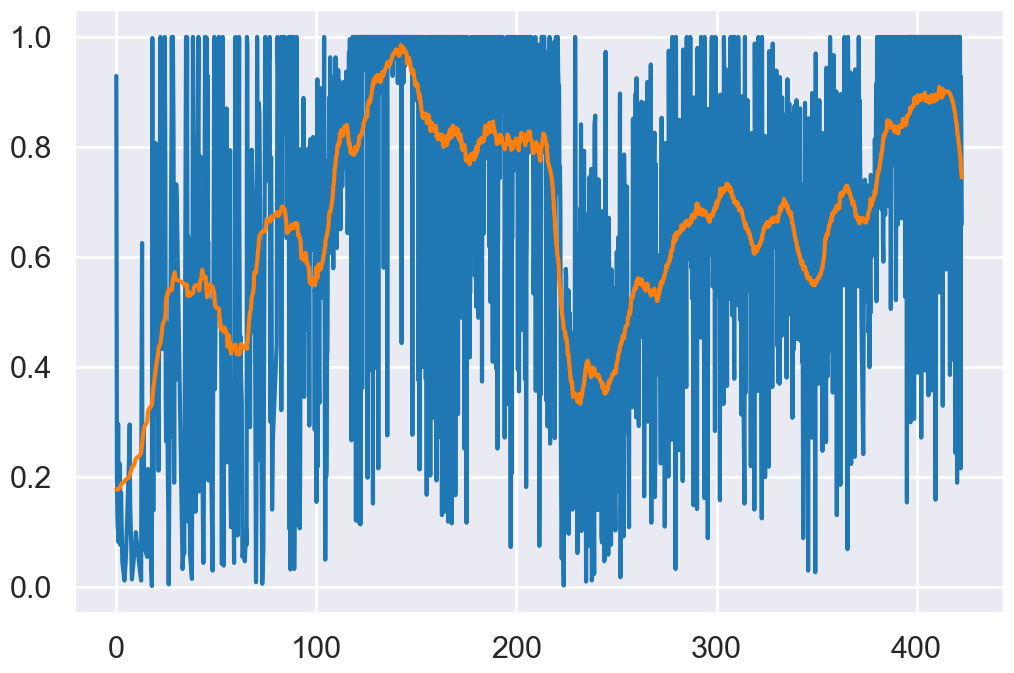

In [147]:
q = savgol_filter(df_m2['confidence'], window_length = 101, polyorder = 3)
plt.plot(df_m2['start'],df_m2['confidence'])
plt.plot(df_m2['start'],q)

#### Loudness_start

The onset loudness of the segment in decibels (dB). Combined with loudness_max and loudness_max_time, these components can be used to describe the “attack” of the segment.


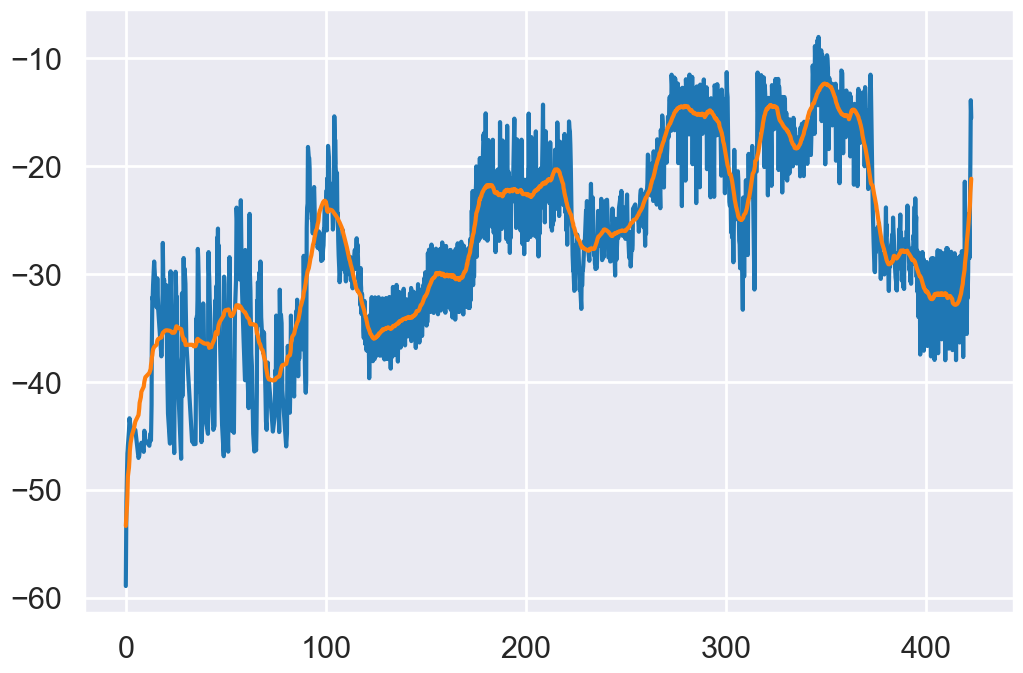

In [148]:
q = savgol_filter(df_m2['loudness_start'], window_length = 101, polyorder = 3)
plt.plot(df_m2['start'],df_m2['loudness_start'])
plt.plot(df_m2['start'],q)

#### Loudness_max

The peak loudness of the segment in decibels (dB). Combined with loudness_start and loudness_max_time, these components can be used to describe the “attack” of the segment.


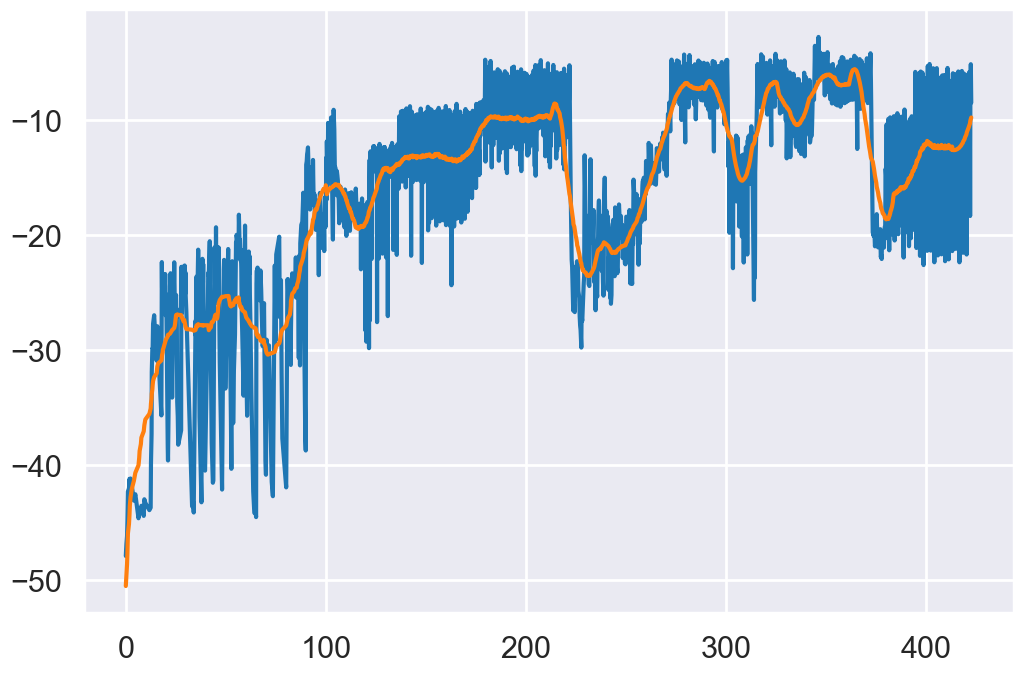

In [149]:
q = savgol_filter(df_m2['loudness_max'], window_length = 101, polyorder = 3)
plt.plot(df_m2['start'],df_m2['loudness_max'])
plt.plot(df_m2['start'],q)

#### Loudness_max_time

The segment-relative offset of the segment peak loudness in seconds. Combined with loudness_start and loudness_max, these components can be used to describe the “attack” of the segment.


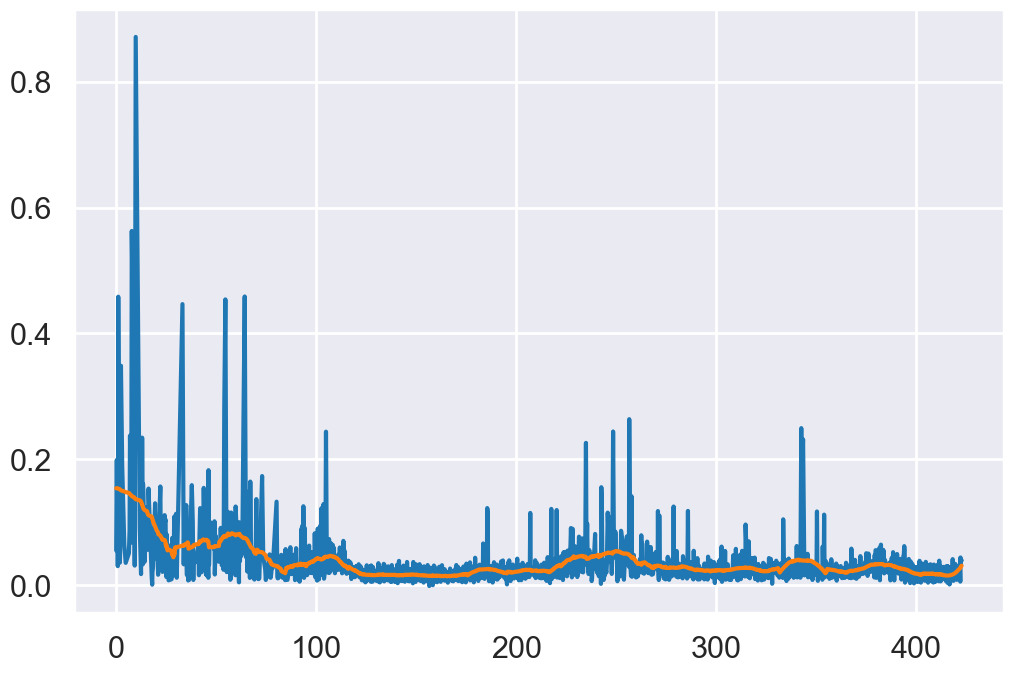

In [150]:
q = savgol_filter(df_m2['loudness_max_time'], window_length = 101, polyorder = 3)
plt.plot(df_m2['start'],df_m2['loudness_max_time'])
plt.plot(df_m2['start'],q)

#### Loudness_end

The offset loudness of the segment in decibels (dB). This value should be equivalent to the loudness_start of the following segment.


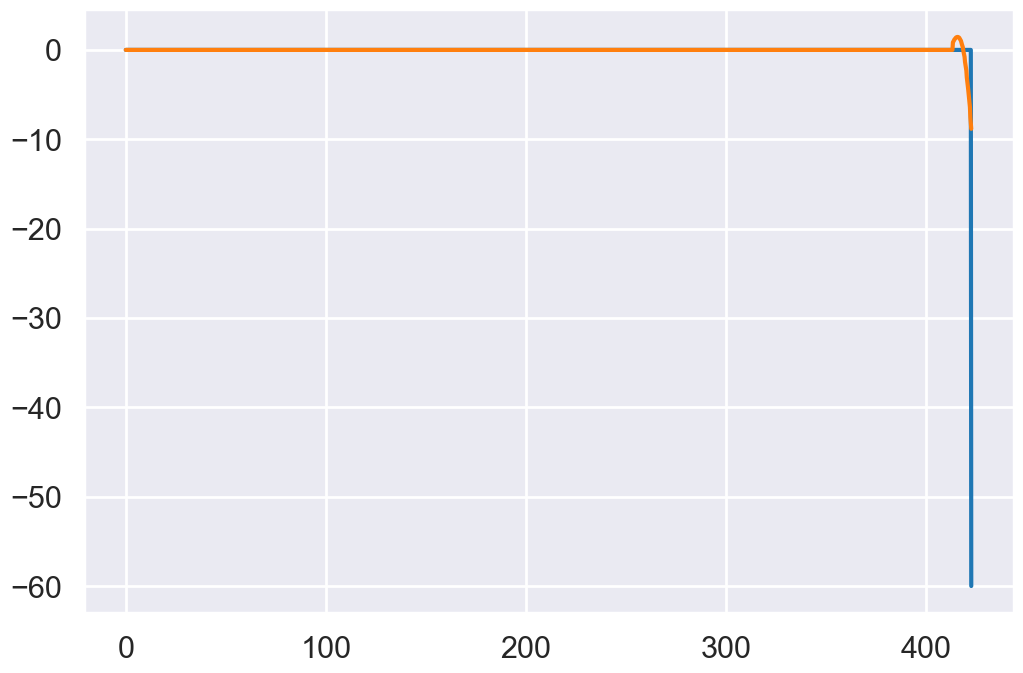

In [151]:
q = savgol_filter(df_m2['loudness_end'], window_length = 101, polyorder = 3)
plt.plot(df_m2['start'],df_m2['loudness_end'])
plt.plot(df_m2['start'],q)

#### Pitches

A “chroma” vector representing the pitch content of the segment, corresponding to the 12 pitch classes C, C#, D to B, with values ranging from 0 to 1 that describe the relative dominance of every pitch in the chromatic scale.


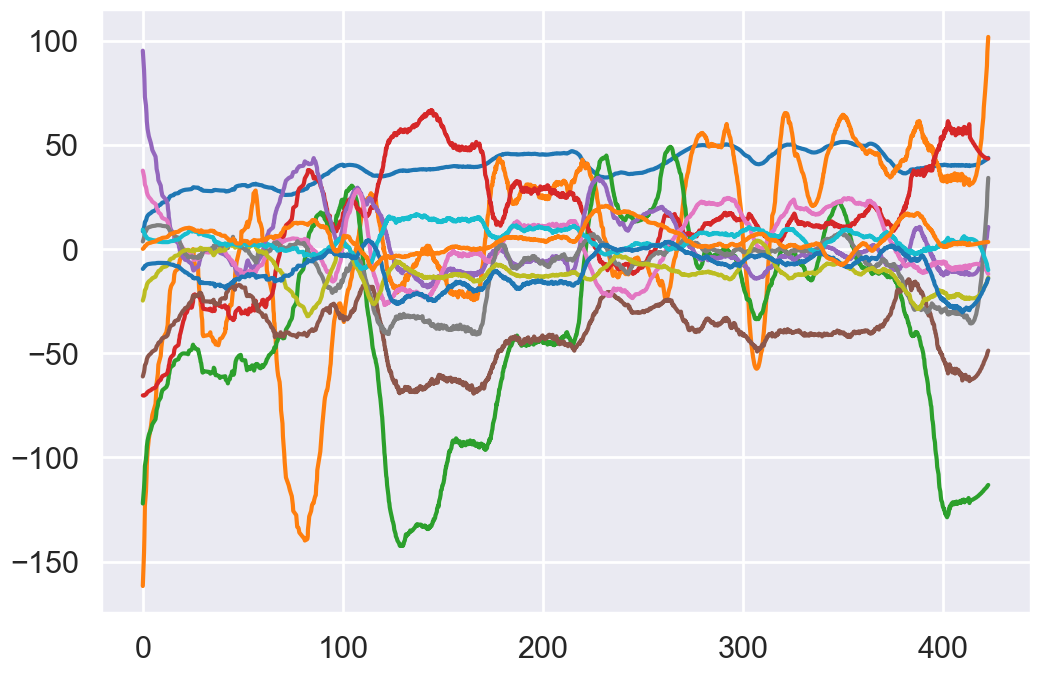

In [152]:
for t in timbre_nombre:
    plt.plot(df_m2['start'],savgol_filter(df_m2[t], window_length = 101, polyorder = 3))

#### Timbre

Timbre is the quality of a musical note or sound that distinguishes different types of musical instruments, or voices. Timbre vectors are best used in comparison with each other.


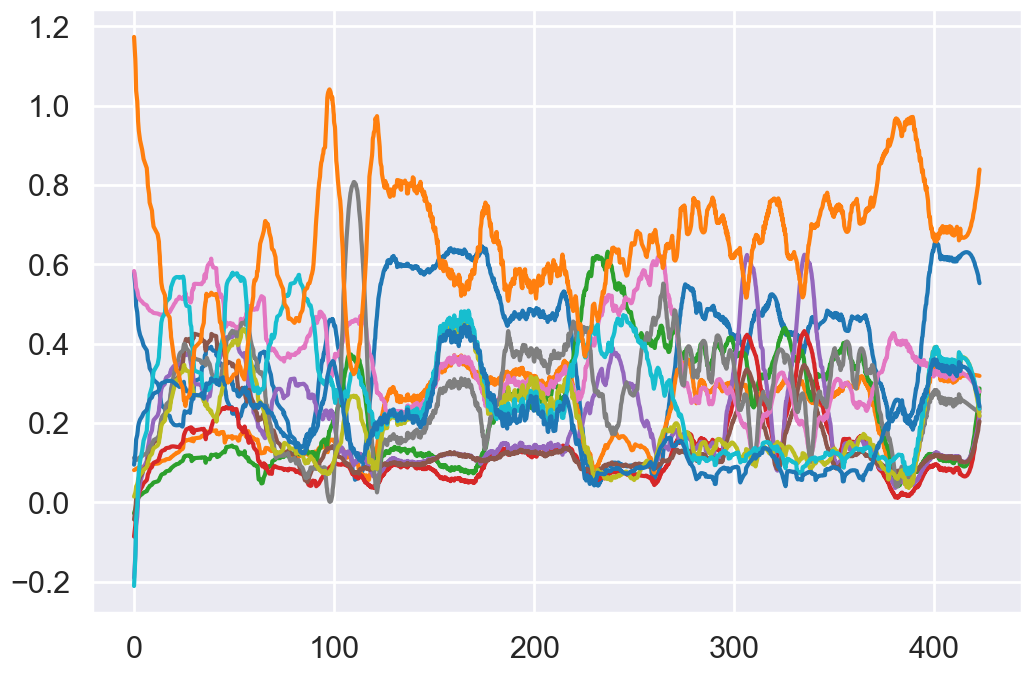

In [153]:
for p in pitches_nombre:
    plt.plot(df_m2['start'],savgol_filter(df_m2[p], window_length = 101, polyorder = 3))

In [119]:
rank_mean = df.stack().groupby(df.rank(method='first').stack().astype(int)).mean()
rank_mean

NameError: name 'df' is not defined

In [ ]:
a = pd.DataFrame(data={'A':list(range(50)),'B':list(range(100, 0, -2))})
np.ceil(a['B'].rank().mul(50/len(a))).astype(int)

In [ ]:
quantil=10 # decil
a = pd.DataFrame(data={'A':list(range(50)),'B':list(range(100, 0, -2))})
np.ceil(a['B'].rank().mul(quantil/len(a))).astype(int)
